# Classification with multiple Approaches
* Mohammad Hassan Heydari

## 1. Classification with Neural Networks

**Importing necessary libraries and checking platform**

In [169]:
import os
os.environ['KERAS_BACKEND'] = 'jax'

import jax.numpy as jnp

import jax
import pandas as pd
import keras

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [170]:
device = jax.devices()[0]
print(f'Training platform : {device.platform}')
print(f'Device Name : {device.device_kind}')
print(f'Keras backend: {keras.backend.backend()}')

Training platform : gpu
Device Name : NVIDIA GeForce MX450
Keras backend: jax


**Loading data**

In [171]:
leaves_csv = pd.read_csv('Data/leaves.csv')

leaves_csv = leaves_csv.sample(frac=1).reset_index(drop=True)

leaves_np = jnp.asarray(leaves_csv)
print(f'shape of leaves: {leaves_np.shape}')

shape of leaves: (339, 16)


In [172]:
# first column is targets, other columns are features, so :
targets = leaves_np[:, 0].astype(dtype=jnp.int32)
features = leaves_np[:, 1:]
print(f'shape of features: {features.shape}')
print(f'shape of targets: {targets.shape}')
print(f'first 10 elements of targets array: {targets[0:10]}')

shape of features: (339, 15)
shape of targets: (339,)
first 10 elements of targets array: [36  9 14 33 10  5 35 22 14 10]


In [173]:
X_train = features[:300]
X_test = features[300:]
y_train = targets[:300]
y_test = targets[300:]

print(f'shape of X_train : {X_train.shape}')
print(f'shape of X_test : {X_test.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train : (300, 15)
shape of X_test : (39, 15)
shape of y_train : (300,)
shape of y_test: (39,)


**Initializing the model**

In [179]:
model = keras.Sequential([
    keras.layers.Input(shape=(15,)),
    keras.layers.Dense(128, activation='elu', name='Dense_1'),
    keras.layers.Dropout(0.2, name='Dropout_1'),
    keras.layers.Dense(512, activation='elu', name='Dense_2'),
    keras.layers.Dropout(0.2, name='Dropout_2'),
    keras.layers.Dense(64, activation='elu', name='Dense_3'),
    keras.layers.Dense(36, activation='softmax', name='Output'),
])

In [175]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,268 (403.39 KB)

 Trainable params: 103,268 (403.39 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='lion', metrics=['accuracy'], jit_compile= True)

In [181]:
checkpoint = keras.callbacks.ModelCheckpoint('model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test), verbose=2, callbacks=[checkpoint])

Epoch 1/400

Epoch 1: val_accuracy improved from -inf to 0.10256, saving model to model.keras
10/10 - 2s - 214ms/step - accuracy: 0.0600 - loss: 3.4271 - val_accuracy: 0.1026 - val_loss: 3.1364
Epoch 2/400

Epoch 2: val_accuracy improved from 0.10256 to 0.15385, saving model to model.keras
10/10 - 1s - 62ms/step - accuracy: 0.1100 - loss: 3.0565 - val_accuracy: 0.1538 - val_loss: 3.0992
Epoch 3/400

Epoch 3: val_accuracy did not improve from 0.15385
10/10 - 0s - 7ms/step - accuracy: 0.1800 - loss: 2.7859 - val_accuracy: 0.1026 - val_loss: 3.0140
Epoch 4/400

Epoch 4: val_accuracy did not improve from 0.15385
10/10 - 0s - 7ms/step - accuracy: 0.2167 - loss: 2.6111 - val_accuracy: 0.1282 - val_loss: 2.6583
Epoch 5/400

Epoch 5: val_accuracy improved from 0.15385 to 0.20513, saving model to model.keras
10/10 - 0s - 11ms/step - accuracy: 0.2133 - loss: 2.4066 - val_accuracy: 0.2051 - val_loss: 2.7369
Epoch 6/400

Epoch 6: val_accuracy improved from 0.20513 to 0.28205, saving model to model

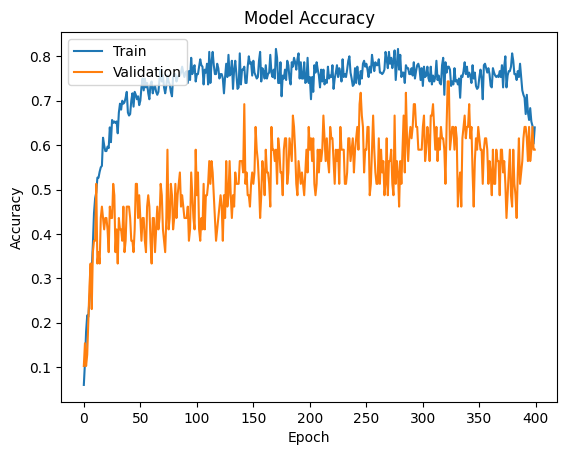

In [182]:
from matplotlib import pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 2. Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [184]:
def polynomial_features(X_train, X_test, degree):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    return X_train_poly, X_test_poly

degree = 3
X_train, X_test = polynomial_features(X_train, X_test, degree= degree)

In [187]:

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [188]:
y_test_pred = rf_classifier.predict(X_test)
y_train_pred = rf_classifier.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy train : {accuracy_train}')
print(f'Accuracy test : {accuracy_test}')

Accuracy train : 1.0
Accuracy test : 0.717948717948718
